In [1]:
#!pip install simple_fpa

In [2]:
# %%capture out
# ! cd ..; pip install . --use-feature=in-tree-build

In [3]:
%%capture out
! cd ..; pip install .

In [4]:
print((out.stdout.split('\n')[-2]))

In [5]:
from simple_fpa import Model
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pylab import rcParams

rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Arial"],
})

rcParams['figure.dpi'] = 200

In [6]:
df = pd.read_csv('../_data/haile_data_prepared.csv', index_col=0)

In [7]:
model = Model(data = df, auctionid_columns = ['auctionid'], bid_column = 'actual_bid')
cont_covs = ['adv_value', 'hhi', 'volume_total_1']
disc_covs = ['year', 'forest']
model.residualize(cont_covs, disc_covs, 'multiplicative')

In [8]:
# model.data._resid = np.sort(np.random.uniform(0,1,size = len(model.data)))

In [9]:
model.summary()

                            OLS Regression Results                            
Dep. Variable:     np.log(actual_bid)   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.495e+04
Date:                Thu, 05 May 2022   Prob (F-statistic):               0.00
Time:                        22:08:53   Log-Likelihood:                -37633.
No. Observations:               60758   AIC:                         7.536e+04
Df Residuals:                   60711   BIC:                         7.578e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

In [10]:
model.trim_residuals(10)
model.fit(smoothing_rate = 0.2, trim_percent = 5, reflect = True)
model.predict()

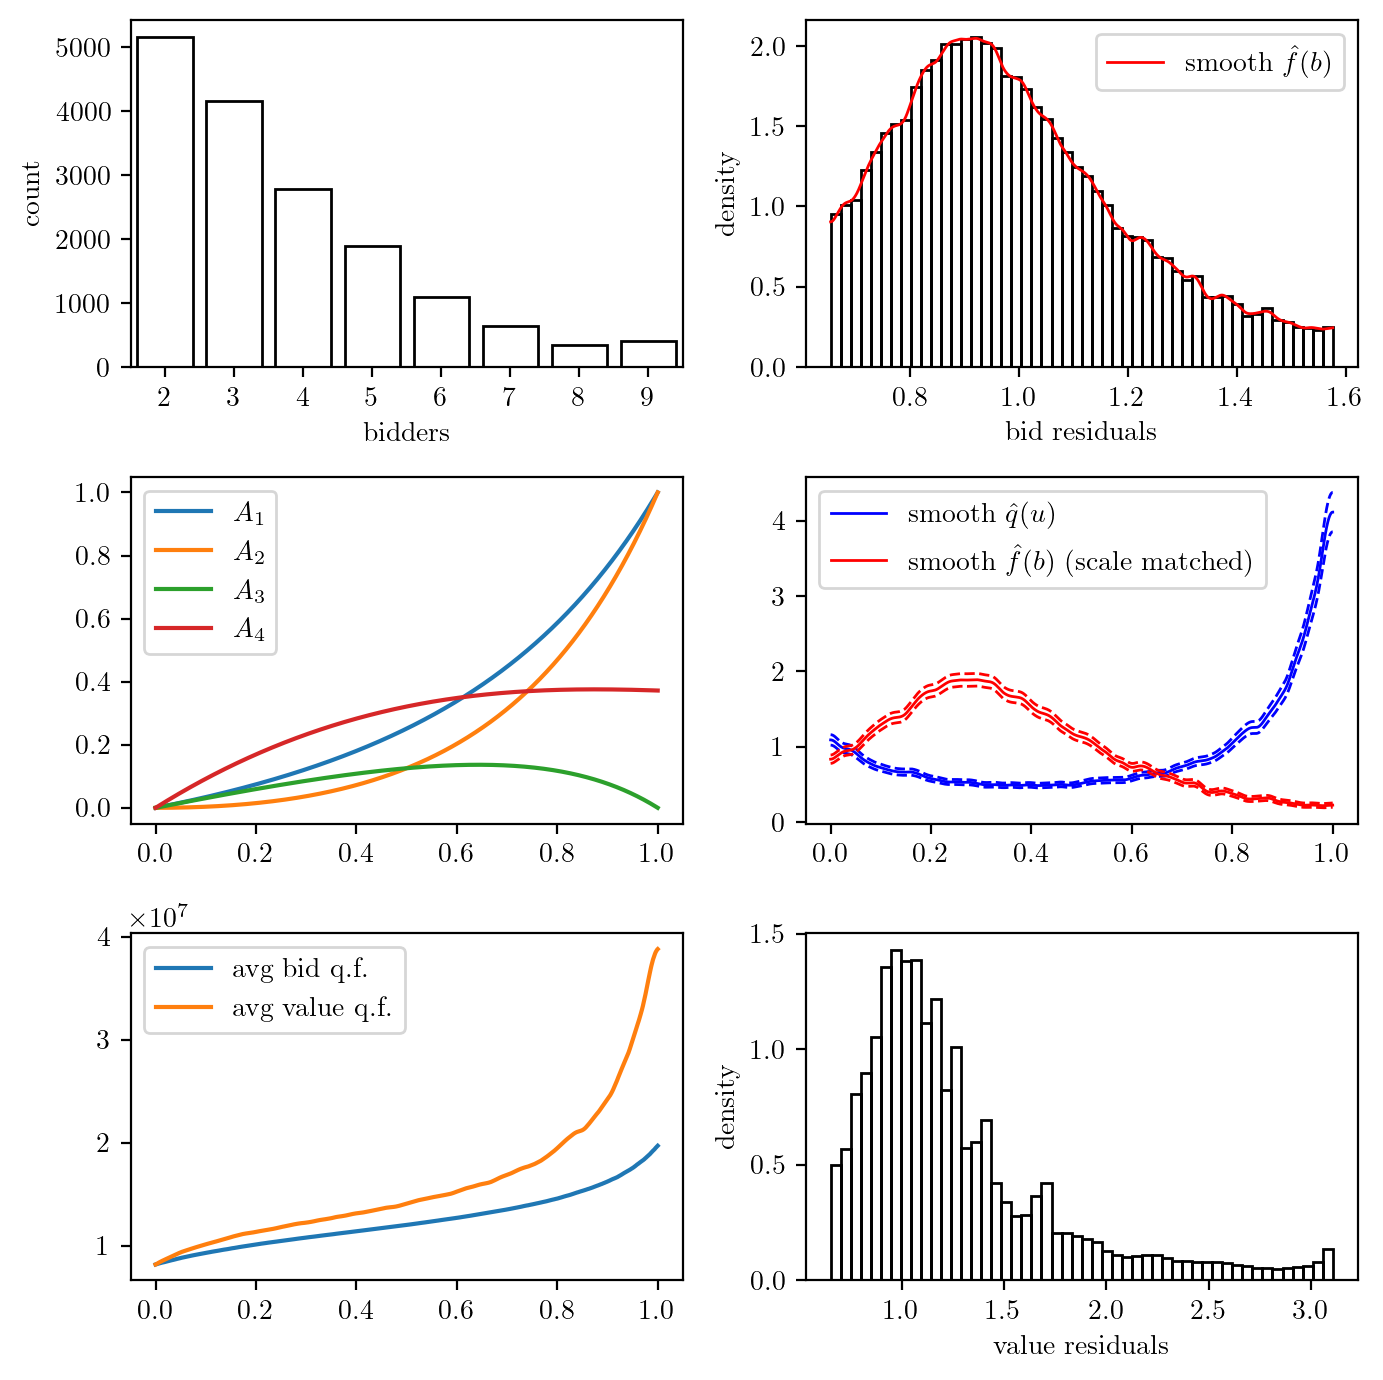

In [11]:
model.plot_stats()

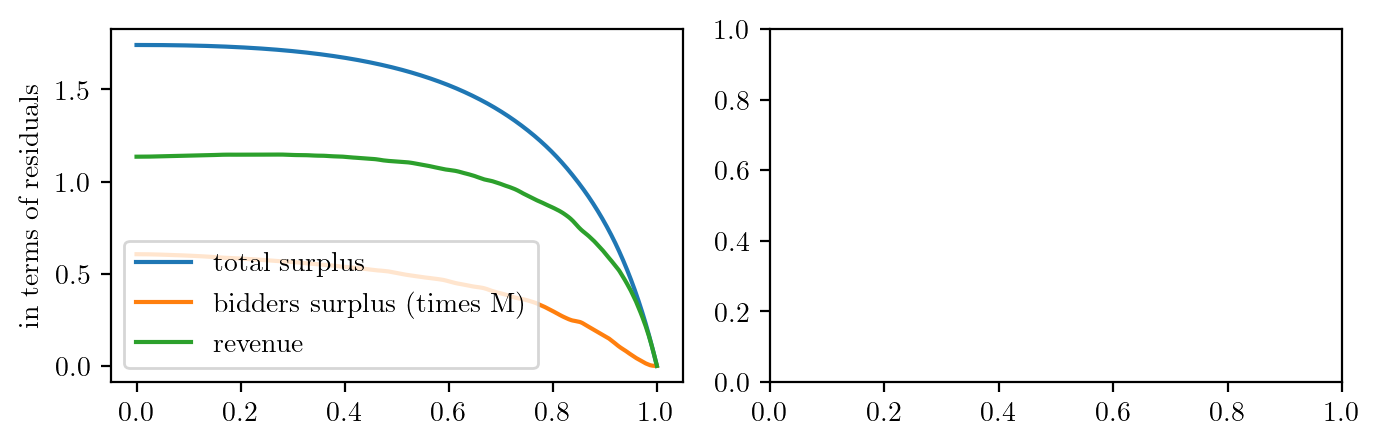

In [12]:
model.plot_counterfactuals()

In [13]:
model.data.sample(5)

,auctionid,hhi,forest,adv_value,year,state,volume_total_1,actual_bid,_bidders,_resid,_fitted,_trimmed,_u,_hat_q,_hat_v,_latent_resid,_ts,_bs,_rev,_latent_actual_bid
42492,13928,1.000000,13,803600.0,73,48,1435.0,1071138.0,4,0.544349,1.967740e+06,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4122,4122,0.506208,8,8584407.0,88,51,1048.0,11599327.0,5,0.951462,1.219106e+07,0,0.481555,0.490869,1.106077,1.106077,1.625769,0.057057,1.112259,1.348425e+07
41198,11989,0.224255,3,1229212.0,89,27,254.0,2150859.0,7,1.227447,1.752302e+06,0,0.851353,1.262179,1.701306,1.701306,0.985622,0.026522,0.746923,2.981203e+06
40809,11474,0.815512,7,1724225.0,89,28,84.0,1805925.0,3,0.951394,1.898188e+06,0,0.481391,0.490740,1.105941,1.105941,1.625878,0.057063,1.112309,2.099283e+06
20492,4023,0.516835,6,8334291.0,88,22,841.0,10421473.0,4,0.897199,1.161557e+07,0,0.370661,0.487633,1.028606,1.028606,1.683577,0.060639,1.137828,1.194784e+07
